# 5. Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neural_network as nn

## 5.1 Feed-forward Network Functions

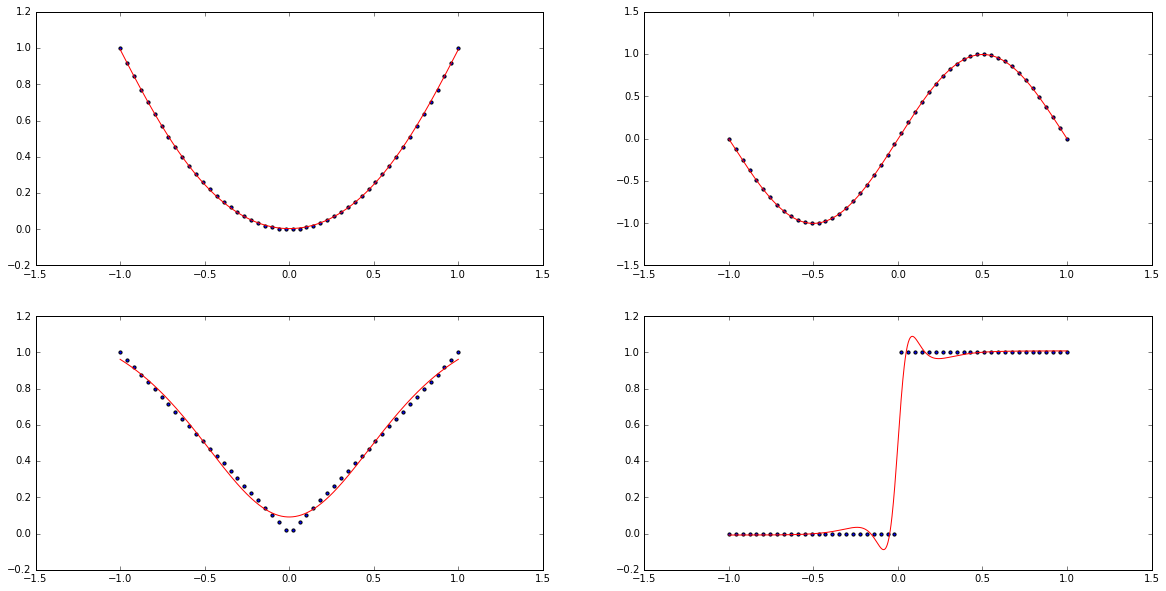

In [2]:
def create_toy_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)

def sinusoidal(x):
    return np.sin(np.pi * x)

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

func_list = [np.square, sinusoidal, np.abs, heaviside]
plt.figure(figsize=(20, 10))
x = np.linspace(-1, 1, 1000)[:, None]
for i, func in enumerate(func_list):
    plt.subplot(2, 2, i + 1)
    x_train, y_train = create_toy_data(func)
    model = nn.NeuralNetwork([nn.MatMul(1, 3), nn.Add(3), nn.Tanh(), nn.MatMul(3, 1), nn.Add(1)], nn.SumSquaresError())
    optimizer = nn.GradientDescent(model, 0.01)
    for _ in range(100000):
        optimizer.update(x_train, y_train)
    y = model.forward(x)
    plt.scatter(x_train, y_train, s=10)
    plt.plot(x, y, color="r")
plt.show()

## 5.3 Error Backpropagation

In [3]:
def create_toy_data():
    x = np.random.uniform(-1., 1., size=(100, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)

x_train, y_train = create_toy_data()

layers = [nn.MatMul(2, 4), nn.Add(4), nn.Tanh(), nn.MatMul(4, 1), nn.Add(1)]
cost_function = nn.SigmoidCrossEntropy()
model = nn.NeuralNetwork(layers, cost_function)
optimizer = nn.GradientDescent(model, 1e-3)
model.check_implementation(np.zeros((1, 2)) + 0.5, np.zeros((1, 1)) + 0.5)
for i in range(100000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x_train, y_train)))
    optimizer.update(x_train, y_train)

finite difference: 0.0206017113924
back propagation : 0.0206017113487
The two values should be approximately the same
step      0, cost 70.146500
step  10000, cost 5.413632
step  20000, cost 3.289504
step  30000, cost 2.350062
step  40000, cost 1.798175
step  50000, cost 1.437447
step  60000, cost 1.188707
step  70000, cost 1.009873
step  80000, cost 0.876529
step  90000, cost 0.773934


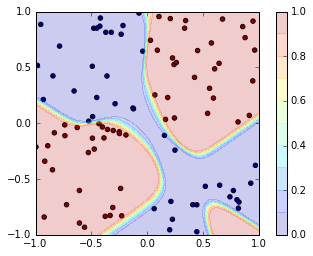

In [4]:
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
y = model.forward(x).reshape(100, 100)

levels = np.linspace(0, 1, 11)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x0, x1, y, levels, alpha=0.2)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 5.5 Regularization in Neural Networks

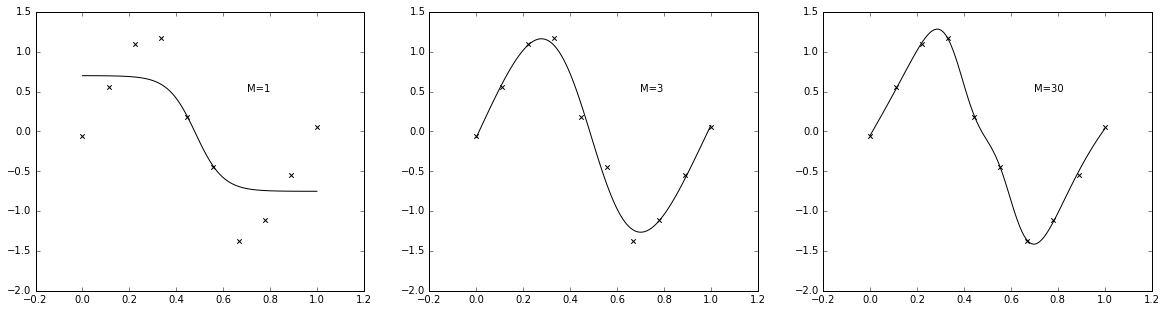

In [5]:
def create_toy_data(n=10):
    x = np.linspace(0, 1, n)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))

x_train, y_train = create_toy_data()
x = np.linspace(0, 1, 100)[:, None]

plt.figure(figsize=(20, 5))
for i, m in enumerate([1, 3, 30]):
    plt.subplot(1, 3, i + 1)
    layers = [nn.MatMul(1, m), nn.Add(m), nn.Tanh(), nn.MatMul(m, 1), nn.Add(1)]
    model = nn.NeuralNetwork(layers, nn.SumSquaresError())
    optimizer = nn.GradientDescent(model, 0.01)
    for j in range(10000 * m):
        optimizer.update(x_train, y_train)
    y = model.forward(x)
    plt.scatter(x_train, y_train, marker="x", color="k")
    plt.plot(x, y, color="k")
    plt.annotate("M={}".format(m), (0.7, 0.5))
plt.show()

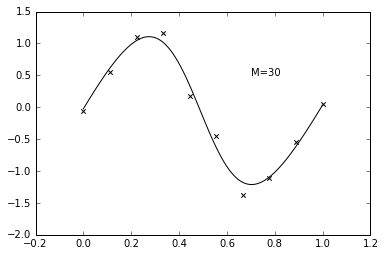

In [6]:
alpha = 1e-2
layers = [
    nn.MatMul(1, 30, alpha=alpha),
    nn.Add(30, alpha=alpha),
    nn.Tanh(),
    nn.MatMul(30, 1, alpha=alpha),
    nn.Add(1, alpha=alpha)]
model = nn.NeuralNetwork(layers, nn.SumSquaresError())
optimizer = nn.GradientDescent(model, 0.01)
for i in range(300000):
    optimizer.update(x_train, y_train)
y = model.forward(x)
plt.scatter(x_train, y_train, marker="x", color="k")
plt.plot(x, y, color="k")
plt.annotate("M=30", (0.7, 0.5))
plt.show()

In [7]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1, 2)
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)[:, None]

x_train, y_train = create_toy_data()

model = nn.NeuralNetwork([nn.MatMul(2, 4), nn.Add(4), nn.Tanh(), nn.MatMul(4, 1), nn.Add(1)], nn.SigmoidCrossEntropy())
optimizer1 = nn.GradientDescent(model, 1e-3)

a = 1e-1
layers = [
    nn.MatMul(2, 4, alpha=a),
    nn.Add(4, alpha=a),
    nn.Tanh(),
    nn.MatMul(4, 1, alpha=a),
    nn.Add(1, alpha=a)]
model_regularized = nn.NeuralNetwork(layers, nn.SigmoidCrossEntropy())
optimizer2 = nn.GradientDescent(model_regularized, 1e-3)
for i in range(100000):
    optimizer1.update(x_train, y_train)
    optimizer2.update(x_train, y_train)

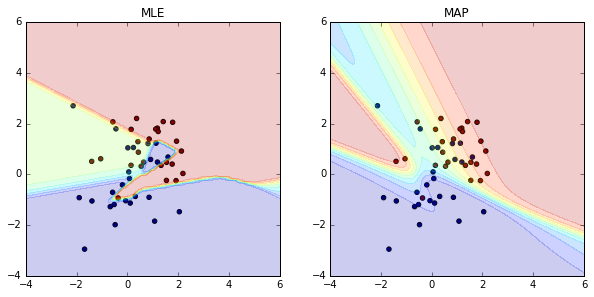

In [8]:
x0, x1 = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x = np.array([x0, x1]).reshape(2, -1).T

levels = np.linspace(0, 1, 11)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x0, x1, model.forward(x).reshape(100, 100), levels, alpha=0.2)
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MLE")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x0, x1, model_regularized.forward(x).reshape(100, 100), levels, alpha=0.2)
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("MAP")
plt.show()

## 5.6 Mixture Density Networks

In [9]:
def create_toy_data(func, n=300):
    t = np.random.uniform(size=(n, 1))
    x = func(t) + np.random.uniform(-0.05, 0.05, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func)

In [10]:
def sample(x, t, n=None):
    assert len(x) == len(t)
    N = len(x)
    if n is None:
        n = N
    indices = np.random.choice(N, n, replace=False)
    return x[indices], t[indices]

layers = [
    nn.MatMul(1, 5, std=0.1),
    nn.Add(5),
    nn.Tanh(),
    nn.MatMul(5, 9, std=0.1),
    nn.Add(9)]
cost_function = nn.GaussianMixtureNLL(3)
model = nn.NeuralNetwork(layers, cost_function)
optimizer = nn.GradientDescentExponentialDecay(model, 1e-4, decay_step=10000, decay_rate=0.9)
model.check_implementation(np.array([[0.5]]), np.array([[0.5]]))
learning_rate = 1e-4
for i in range(300000):
    if i % 10000 == 0:
        print("step %6d, cost %f" % (i, model.cost(x_train, y_train)))
    batch = sample(x_train, y_train, n=100)
    optimizer.update(*batch)

finite difference: 6.46355191591e-05
back propagation : 6.46355554459e-05
The two values should be approximately the same
step      0, cost 324.070563
step  10000, cost -142.034141
step  20000, cost -323.188154
step  30000, cost -170.580612
step  40000, cost -360.684801
step  50000, cost -271.788101
step  60000, cost -343.856939
step  70000, cost -270.030022
step  80000, cost -350.536541
step  90000, cost -397.922394
step 100000, cost -379.499783
step 110000, cost -427.474022
step 120000, cost -431.861302
step 130000, cost -312.375798
step 140000, cost -447.988868
step 150000, cost -448.576987
step 160000, cost -461.203768
step 170000, cost -382.126776
step 180000, cost -466.125051
step 190000, cost -480.437221
step 200000, cost -482.364590
step 210000, cost -483.167035
step 220000, cost -456.022310
step 230000, cost -488.967422
step 240000, cost -490.813162
step 250000, cost -495.062947
step 260000, cost -488.753274
step 270000, cost -495.888279
step 280000, cost -486.589175
step 2900

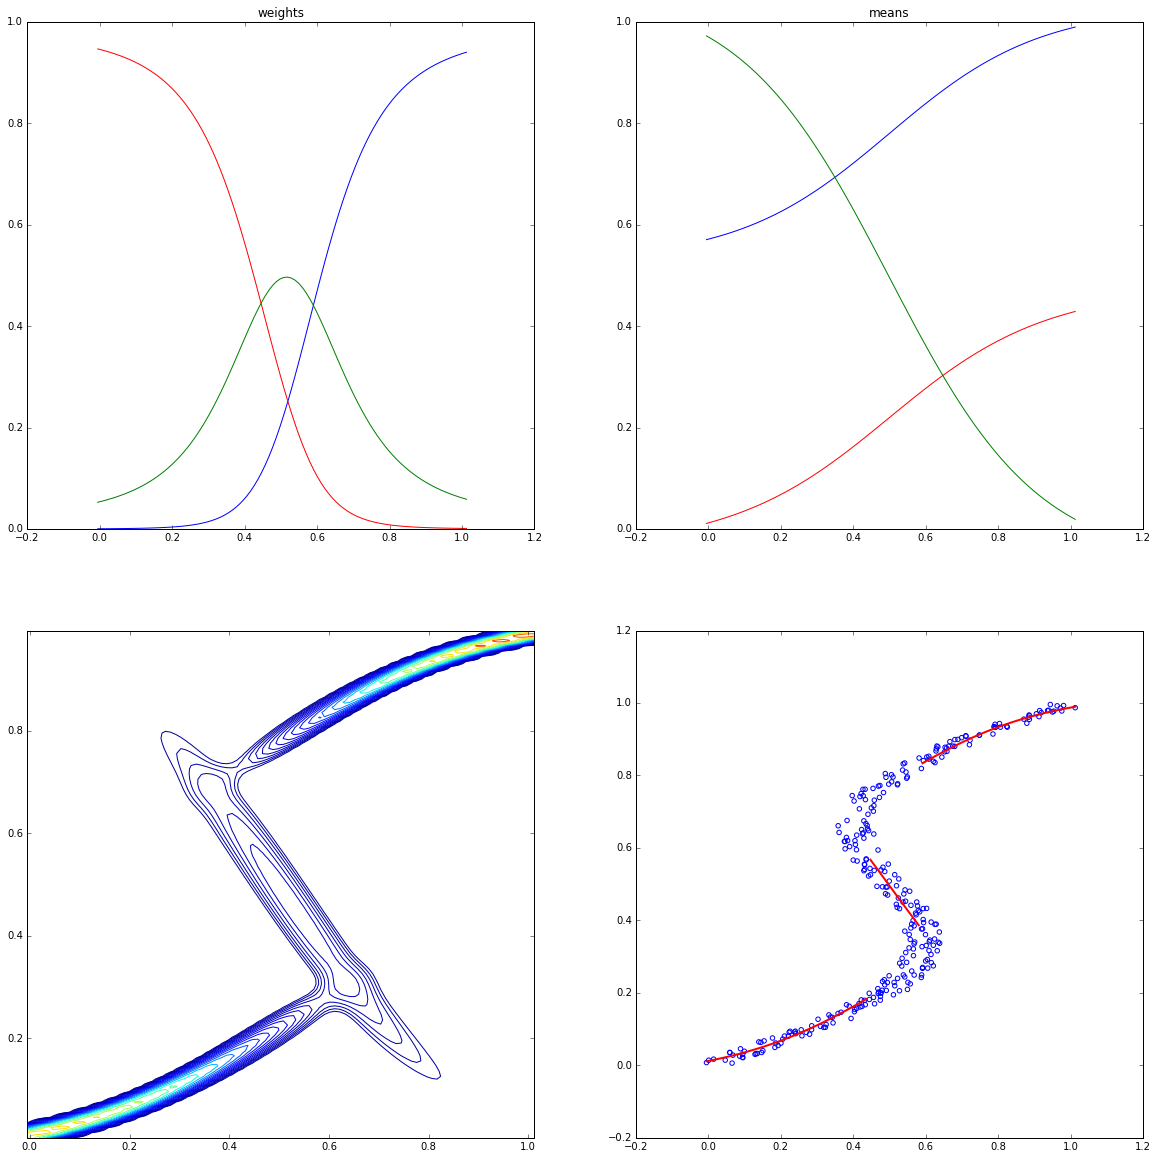

In [11]:
x, y = np.meshgrid(
    np.linspace(x_train.min(), x_train.max(), 100),
    np.linspace(y_train.min(), y_train.max(), 100))
xy = np.array([x, y]).reshape(2, -1).T

sigma, weight, mu = model.forward(xy[:, 0].reshape(-1, 1))
probs = cost_function.gauss(mu, sigma, xy[:, 1].reshape(-1, 1))
probs = np.sum(weight * probs, axis=1).reshape(100, 100)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.plot(x[0], weight[:100, 0], color="blue")
plt.plot(x[0], weight[:100, 1], color="red")
plt.plot(x[0], weight[:100, 2], color="green")
plt.title("weights")

plt.subplot(2, 2, 2)
plt.plot(x[0], mu[:100, 0], color="blue")
plt.plot(x[0], mu[:100, 1], color="red")
plt.plot(x[0], mu[:100, 2], color="green")
plt.title("means")

plt.subplot(2, 2, 3)
levels_log = np.linspace(0, np.log(probs.max()), 21)
levels = np.exp(levels_log)
levels[0] = 0
plt.contour(x, y, probs, levels)
plt.xlim(x_train.min(), x_train.max())
plt.ylim(y_train.min(), y_train.max())

plt.subplot(2, 2, 4)
argmax = np.argmax(weight[:100], axis=1)
for i in range(3):
    indices = np.where(argmax == i)[0]
    plt.plot(x[0, indices], mu[(indices, np.zeros_like(indices) + i)], color="r", linewidth=2)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b")
plt.show()

## 5.7 Bayesian Neural Networks